<a href="https://colab.research.google.com/github/JagratiTalreja01/Super-Resolution-SRCNN-/blob/main/My_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import tensorflow as tf
import numpy as np
from keras.models import Model
from keras.layers import Dense, Conv2D, Activation, Input
from keras.layers.advanced_activations import ReLU
from keras.layers import Input, Conv2D, Concatenate
from tensorflow.keras.layers import BatchNormalization

In [ ]:
from keras.layers.convolutional import DepthwiseConv2D
img_shape1 = (32,32, 1)
input_img1 = Input(shape=(img_shape),name = 'X')

#Redundant Feature Maps
C_1 = Conv2D(64, (3, 3), padding='same', name='CONV2D1')(input_img1)
BatchNormalization()
A_1 = Activation('relu', name='act1')(C_1)

#Intrinsic feature Maps
C_2 = DepthwiseConv2D(64, (3, 3), padding='same', name='CONV2D2')(input_img1)
BatchNormalization()
A_2 = Activation('relu', name='act1')(C_2)

#Concatenation Layer
output_img1 = keras.layers.concatenate([A_1, A_2], axis=1)
model1 = Model(input_img1, output_img1)

ValueError: ignored

In [ ]:
img_shape = (32,32, 1)
input_img = Input(shape=(img_shape),name = 'X')

#SKIP LAYER LAYER CONNECTION
#01 LAYER
C1 = Conv2D(64, (3, 3), padding='same', name='CONV2D1')(input_img)
C2 = Conv2D(64, (3, 3), padding='same', name='CONV2D2')(C1)

#02 LAYER
C3 = Conv2D(64, (3, 3), padding='same', name='CONV2D3')(input_img)
C4 = Conv2D(64, (3, 3), padding='same', name='CONV2D4')(C3)

In [ ]:
#05 CONCATENATION LAYER
output_img = keras.layers.concatenate([C2,C4], axis = -1)
A = PReLU()(output_img)
#model = Model(input_img, A)

In [ ]:
#05 SUM LAYER
output_img = keras.layers.add([input_img, A])
#A4 = Activation('relu', name='ReLU4')(output_img)
model = Model(input_img, output_img)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 X (InputLayer)                 [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 CONV2D1 (Conv2D)               (None, 32, 32, 64)   640         ['X[0][0]']                      
                                                                                                  
 CONV2D3 (Conv2D)               (None, 32, 32, 64)   640         ['X[0][0]']                      
                                                                                                  
 CONV2D2 (Conv2D)               (None, 32, 32, 64)   36928       ['CONV2D1[0][0]']                
                                                                                              

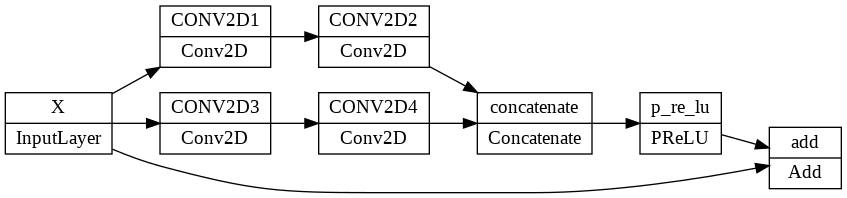

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96
)